# Keep-it-dry! LogisticRegression
Dataset preprocessing from: https://www.kaggle.com/code/kevinmorgado/top-20-product-failure-prediction/notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

from pprint import pprint

## Dataset Selection

In [2]:
datasets_dict = {}

datasets_dict['ii_mm_adasyn'] = pd.read_csv('./../Preprocessing/kid_train_ii_mm_adasyn.csv', index_col=0)
datasets_dict['ii_mm_ros'] = pd.read_csv('./../Preprocessing/kid_train_ii_mm_ros.csv', index_col=0)
datasets_dict['ii_mm_rus'] = pd.read_csv('./../Preprocessing/kid_train_ii_mm_rus.csv', index_col=0)
datasets_dict['ii_mm_smote'] = pd.read_csv('./../Preprocessing/kid_train_ii_mm_smote.csv', index_col=0)
datasets_dict['ii_mm_smotenc_1'] = pd.read_csv('./../Preprocessing/kid_train_ii_mm_smotenc_1.csv', index_col=0)

datasets_dict['ii_ro_adasyn'] = pd.read_csv('./../Preprocessing/kid_train_ii_ro_adasyn.csv', index_col=0)
datasets_dict['ii_ro_ros'] = pd.read_csv('./../Preprocessing/kid_train_ii_ro_ros.csv', index_col=0)
datasets_dict['ii_ro_rus'] = pd.read_csv('./../Preprocessing/kid_train_ii_ro_rus.csv', index_col=0)
datasets_dict['ii_ro_smote'] = pd.read_csv('./../Preprocessing/kid_train_ii_ro_smote.csv', index_col=0)
datasets_dict['ii_ro_smotenc_1'] = pd.read_csv('./../Preprocessing/kid_train_ii_ro_smotenc_1.csv', index_col=0)

datasets_dict['ii_st_adasyn'] = pd.read_csv('./../Preprocessing/kid_train_ii_st_adasyn.csv', index_col=0)
datasets_dict['ii_st_ros'] = pd.read_csv('./../Preprocessing/kid_train_ii_st_ros.csv', index_col=0)
datasets_dict['ii_st_rus'] = pd.read_csv('./../Preprocessing/kid_train_ii_st_rus.csv', index_col=0)
datasets_dict['ii_st_smote'] = pd.read_csv('./../Preprocessing/kid_train_ii_st_smote.csv', index_col=0)
datasets_dict['ii_st_smotenc_1'] = pd.read_csv('./../Preprocessing/kid_train_ii_st_smotenc_1.csv', index_col=0)

datasets_dict['ki_mm_adasyn'] = pd.read_csv('./../Preprocessing/kid_train_ki_mm_adasyn.csv', index_col=0)
datasets_dict['ki_mm_ros'] = pd.read_csv('./../Preprocessing/kid_train_ki_mm_ros.csv', index_col=0)
datasets_dict['ki_mm_rus'] = pd.read_csv('./../Preprocessing/kid_train_ki_mm_rus.csv', index_col=0)
datasets_dict['ki_mm_smote'] = pd.read_csv('./../Preprocessing/kid_train_ki_mm_smote.csv', index_col=0)
datasets_dict['ki_mm_smotenc_1'] = pd.read_csv('./../Preprocessing/kid_train_ki_mm_smotenc_1.csv', index_col=0)

datasets_dict['ki_ro_adasyn'] = pd.read_csv('./../Preprocessing/kid_train_ki_ro_adasyn.csv', index_col=0)
datasets_dict['ki_ro_ros'] = pd.read_csv('./../Preprocessing/kid_train_ki_ro_ros.csv', index_col=0)
datasets_dict['ki_ro_rus'] = pd.read_csv('./../Preprocessing/kid_train_ki_ro_rus.csv', index_col=0)
datasets_dict['ki_ro_smote'] = pd.read_csv('./../Preprocessing/kid_train_ki_ro_smote.csv', index_col=0)
datasets_dict['ki_ro_smotenc_1'] = pd.read_csv('./../Preprocessing/kid_train_ki_ro_smotenc_1.csv', index_col=0)

datasets_dict['ki_st_adasyn'] = pd.read_csv('./../Preprocessing/kid_train_ki_st_adasyn.csv', index_col=0)
datasets_dict['ki_st_ros'] = pd.read_csv('./../Preprocessing/kid_train_ki_st_ros.csv', index_col=0)
datasets_dict['ki_st_rus'] = pd.read_csv('./../Preprocessing/kid_train_ki_st_rus.csv', index_col=0)
datasets_dict['ki_st_smote'] = pd.read_csv('./../Preprocessing/kid_train_ki_st_smote.csv', index_col=0)
datasets_dict['ki_st_smotenc_1'] = pd.read_csv('./../Preprocessing/kid_train_ki_st_smotenc_1.csv', index_col=0)

c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

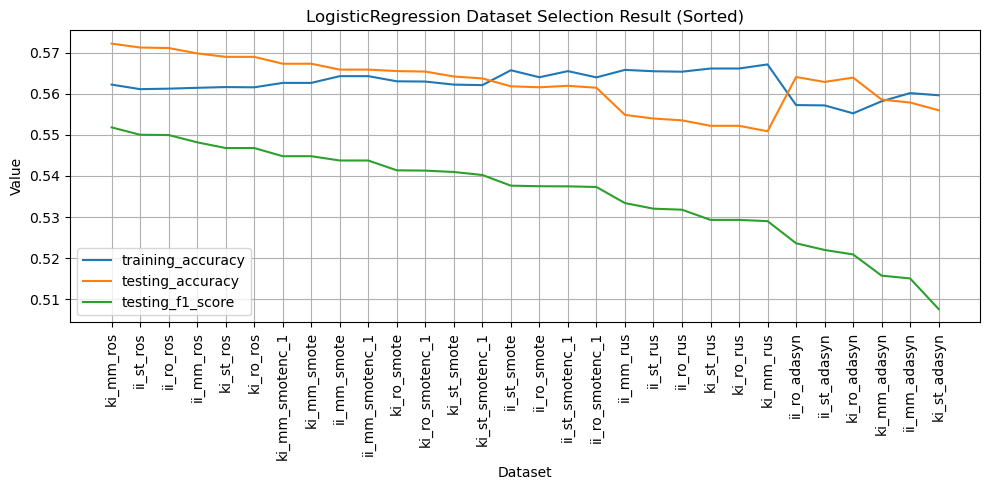

In [3]:
dataset_result = {}
dataset_result['dataset'] = []
dataset_result['training_accuracy'] = []
dataset_result['testing_accuracy'] = []
dataset_result['testing_f1_score'] = []

for title, data in datasets_dict.items():

    X_df = data.copy()
    y_df = X_df.pop('failure')
    object_cols = X_df.select_dtypes(include=['object']).columns
    X_df = X_df.drop(object_cols, axis=1)

    X_train, X_val, y_train, y_val = train_test_split(X_df, y_df, test_size=.2, stratify=y_df, random_state=42)
    
    lr_dataset = LogisticRegression()
    lr_dataset.fit(X_train, y_train)
    
    y_predict = lr_dataset.predict(X_val)

    dataset_result['dataset'].append(title)
    dataset_result['training_accuracy'].append(lr_dataset.score(X_train, y_train))
    dataset_result['testing_accuracy'].append(lr_dataset.score(X_val, y_val))
    dataset_result['testing_f1_score'].append(f1_score(y_val, y_predict))

df_result = pd.DataFrame(dataset_result)
df_result_sorted = df_result.sort_values(by='testing_f1_score', ascending=False)

plt.figure(figsize=[10, 5])

sns.lineplot(data=df_result_sorted, x='dataset', y='training_accuracy', label='training_accuracy').grid(True)
sns.lineplot(data=df_result_sorted, x='dataset', y='testing_accuracy', label='testing_accuracy')
sns.lineplot(data=df_result_sorted, x='dataset', y='testing_f1_score', label='testing_f1_score')

plt.title("LogisticRegression Dataset Selection Result (Sorted)")
plt.ylabel("Value")
plt.xlabel("Dataset")
plt.xticks(rotation=90)

plt.tight_layout()
plt.legend()
plt.show()

## Data Read

In [42]:
df_train = pd.read_csv('./../Preprocessing/kid_train_clean_kaggle.csv', index_col=0)

In [43]:
df_train.head()

,loading,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,80.10,4,18.040,12.518,15.748,19.292,11.739,20.155,10.672,15.859,17.5940,15.193,15.029,15.489,13.034,14.684,764.100,0
1,84.89,3,18.213,11.540,17.717,17.893,12.748,17.889,12.448,17.947,17.9150,11.755,14.732,15.425,14.395,15.631,682.057,0
2,82.43,5,18.057,11.652,16.738,18.240,12.718,18.288,12.715,15.607,19.3088,13.798,16.711,18.631,14.094,17.946,663.376,0
3,101.07,6,17.295,11.188,18.576,18.339,12.583,19.060,12.471,16.346,18.3770,10.020,15.250,15.562,16.154,17.172,826.282,0
4,188.06,8,19.346,12.950,16.990,15.746,11.306,18.093,10.337,17.082,19.9320,12.428,16.182,12.760,13.153,16.412,579.885,0


In [44]:
# Scale
scaler = StandardScaler()
df_train[df_train.columns[:-1]] = scaler.fit_transform(df_train[df_train.columns[:-1]])

## Hyperparameter Tuning using GridSearchCV

In [45]:
X_df = df_train[df_train.columns[:-1]]
y_df = df_train[df_train.columns[-1]]

X_train, X_val, y_train, y_val = train_test_split(X_df, y_df, test_size=.2, random_state=42, stratify=y_df)
X_train.head()

,loading,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
2596,-0.860634,-0.984141,-0.998632,0.780677,0.410919,0.013024,1.283165,0.440426,-0.818952,-0.210637,-2.249565,0.486408,-2.095777,-0.101930,0.658556,-0.670540,0.852095
23021,-0.277386,0.224667,-0.703281,0.551880,-1.147735,-0.598894,0.773277,1.616319,-0.496949,-1.815649,-1.021646,-0.064086,-0.619322,1.449568,-0.707283,-0.775886,0.155902
10202,3.307482,0.224667,0.145601,-0.380522,-0.979396,-0.270573,0.344485,-0.721361,-0.824047,0.468836,-1.176985,-0.017235,0.682804,-0.882844,0.811797,0.128037,-0.336406
19048,-1.029848,1.131272,-0.395876,-0.519218,-0.146830,-1.078670,-1.118275,0.139147,-1.061474,1.380165,-0.105751,0.021348,0.651674,0.833239,0.313432,-1.478803,-1.379195
14789,-0.770626,-0.984141,0.394740,-0.519218,0.381308,0.119754,0.391114,-2.282166,1.980237,-0.644044,0.471895,-1.229836,0.388402,1.402052,0.334753,-0.804947,-1.386141


In [46]:
# Define model
model = LogisticRegression(max_iter=1000)

# Define hyperparameter grid
param_grid = {
    'solver': ['liblinear', 'lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'penalty': ['l2', 'elasticnet'],
    'C': np.logspace(-4, 4, 5)  # Search across different C values in log space
}

# Define GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='f1')  # Use F1 score for imbalanced data

In [47]:
# GridSearchCV fitting
grid_search.fit(X_train, y_train)

c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
150 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\RAYHAN EGAR\anaconda3\Lib\site-package

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': array([1.e-04, 1.e-02, 1.e+00, 1.e+02, 1.e+04]),
                         'penalty': ['l2', 'elasticnet'],
                         'solver': ['liblinear', 'lbfgs', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='f1')

In [48]:
logreg_best = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best f1-score: {grid_search.best_score_}")

Best parameters: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
Best f1-score: 0.00702385226338959


## Prediction

In [49]:
df_submisison = pd.read_csv('./../Preprocessing/kid_test_clean_kaggle.csv', index_col=0)
df_submission_id = df_submisison[['id']].copy()

In [50]:
df_submisison.drop(columns='id', inplace=True)
df_submisison.head()

,loading,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,119.57,6,19.305,10.178,17.534,18.168,11.598,18.654,10.802,15.909,18.0700,13.772,13.659,16.825,13.742,17.710,634.612
1,113.51,0,17.883,11.927,17.228,16.033,11.179,19.368,12.032,13.998,19.2294,12.473,17.468,16.708,14.776,14.102,537.037
2,112.16,4,18.475,10.481,16.619,18.189,12.126,17.774,11.743,17.046,18.0860,10.907,13.363,15.737,17.065,16.021,658.995
3,112.72,10,16.518,10.888,15.293,18.592,11.304,18.948,11.790,18.165,16.1630,10.933,15.501,15.667,12.620,16.111,594.301
4,208.00,8,17.808,12.693,17.678,15.814,13.431,19.141,12.370,14.578,17.8490,11.941,16.070,16.183,13.324,17.150,801.044


In [51]:
X_submission_scaled = scaler.transform(df_submisison)
X_submission_scaled = pd.DataFrame(X_submission_scaled, columns=df_submisison.columns)
X_submission_scaled.head()

,loading,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,-0.211809,-0.077535,1.520891,-1.574117,0.410919,0.668650,-0.123842,-0.372724,-0.638589,-0.156117,-0.741901,1.430307,-1.766688,0.544700,-0.839203,0.757090,-0.559295
1,-0.367650,-1.890746,0.092357,0.196534,0.100608,-1.501523,-0.548579,0.346717,0.614779,-1.541598,0.037753,0.535325,1.621153,0.464129,-0.150287,-1.427341,-1.376874
2,-0.402367,-0.681939,0.687077,-1.267366,-0.516972,0.689996,0.411388,-1.259431,0.320288,0.668212,-0.731142,-0.543614,-2.029959,-0.204537,1.374789,-0.265500,-0.354990
3,-0.387966,1.131272,-1.278914,-0.855328,-1.861653,1.099635,-0.421868,-0.076484,0.368181,1.479490,-2.024289,-0.525701,-0.128357,-0.252742,-1.586750,-0.211010,-0.897060
4,2.062293,0.526868,0.017013,0.972017,0.556948,-1.724131,1.734258,0.117987,0.959200,-1.121096,-0.890516,0.168789,0.377729,0.102595,-1.117700,0.418043,0.835236


In [52]:
y_pred = logreg_best.predict(X_submission_scaled)
y_pred_df = pd.DataFrame(y_pred, columns=['failure'])

In [53]:
y_submission = pd.concat([df_submission_id, y_pred_df], axis=1)

In [55]:
y_submission.to_csv('./../Submission/kid_submission_logreg.csv', index=False)